## Business Problem
- Create a predictive model, which can predict whether the person is diabetic or not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [5]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
continuous=['Glucose','BloodPressure','SkinThickness','Insulin',
            'BMI','DiabetesPedigreeFunction','Age']
discrete_count=['Pregancies']
discrete_categorical=['Outcome'] #Output

#### Exploratory Data Analysis

In [7]:
df[continuous].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


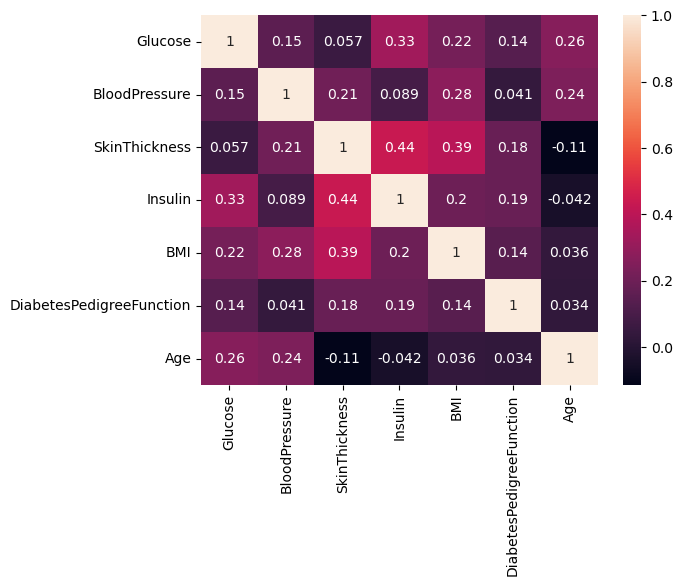

In [8]:
sns.heatmap(df[continuous].corr(),annot=True)
plt.show()

#### Data Cleaning

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Data Wrangling

In [10]:
#No encoding requires

#### X & y

In [11]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

#### Train-Test Split

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,
                                                 random_state=16)

#### Scaling
##### Types
- Standarization
- Normalization

In [28]:
df1=pd.DataFrame({'X1':[1,2,3,4,5]})
df1

,X1
0,1
1,2
2,3
3,4
4,5


In [29]:
#STANDARIZATION

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(df1[["X1"]]) #fit means it calc mean and s.d value and transfrom

array([[-1.41421356],
       [-0.70710678],
       [ 0.        ],
       [ 0.70710678],
       [ 1.41421356]])

- Train Size = 768*0.8=614 records
- Test Size = 768*0.2=154 records

In [30]:
# SCALING
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train.iloc[:,1:8] = sc.fit_transform(X_train.iloc[:,1:8])   #[:,1:8]->Columns from 1 to 7
X_test.iloc[:,1:8] = sc.transform(X_test.iloc[:,1:8])

# Modelling
## Logistic Regression (Baseline Model)


In [31]:
#Modelling
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [32]:
log_reg.intercept_

array([-1.16613796])

In [33]:
log_reg.coef_

array([[ 0.08825561,  1.06457426, -0.26502819,  0.00886999, -0.14529195,
         0.70979187,  0.24218603,  0.16615494]])

## Evaluation

### Train

In [34]:
#Prediction
ypred_train = log_reg.predict(X_train)

#Train Accuracy
from sklearn.metrics import accuracy_score
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#CV Score
from sklearn.model_selection import cross_val_score
print("CV Score:",cross_val_score(log_reg,X_train,y_train,cv=5,scoring='accuracy').mean())

Train Accuracy: 0.7719869706840391
CV Score: 0.752472344395575


## Test

In [35]:
#Prediction
ypred_test = log_reg.predict(X_test)

print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Test Accuracy: 0.8181818181818182


### Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ypred_test)
cm

array([[95,  7],
       [21, 31]], dtype=int64)

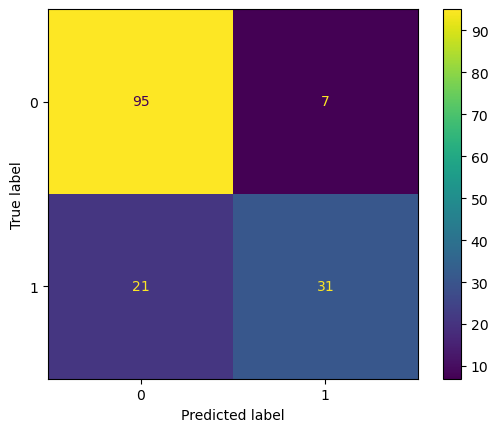

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()
plt.show()

### Classification Report

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       102
           1       0.82      0.60      0.69        52

    accuracy                           0.82       154
   macro avg       0.82      0.76      0.78       154
weighted avg       0.82      0.82      0.81       154



### ROC Curve

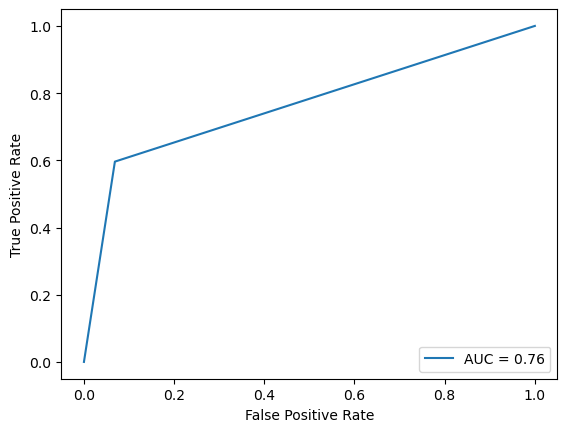

In [39]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr,tpr,thresholds=roc_curve(y_test,ypred_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

### AUC Score

In [40]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,ypred_test)

0.7637631975867271

In [26]:
train_r2=[]
test_r2=[]
cross=[]
for i in range(0,100):
    
    #splitting
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=i)
    
    #modeling
    from sklearn.linear_model import LogisticRegression
    model=LogisticRegression()
    model.fit(X_train,y_train)
    
    #predicting
    from sklearn.metrics import r2_score
    ypred_train=model.predict(X_train)
    train_r2.append(r2_score(y_train,ypred_train))
    ypred_test=model.predict(X_test)
    test_r2.append(r2_score(y_test,ypred_test))
    from sklearn.model_selection import cross_val_score
    cross.append(cross_val_score(model,X_train,y_train,cv=5).mean())

df1=pd.DataFrame({'Train': train_r2,
                   'Test': test_r2,
                   'CV': cross})
gm=df1[(abs((df1['Train']-df1['Test'])<=0.05)& abs((df1['Train']-df1['CV'])<=0.05))]
#print(gm[gm['CV']==(gm['CV'].max())])
print(gm[gm['CV']==(gm['CV'].max())].index.to_list()[0])

7
